# Part 1. Graph representation in Python

In [1]:
#Création de graph vite
import networkx as nx


G = nx.Graph()

Ajout du noeud Mike

In [2]:
G.add_node("Mike")


In [3]:
#Ajout des noeuds Amine, Rémi et Nick
G.add_nodes_from(["Amine", "Remi", "Nick"])

In [4]:
#Ajout de la relation Mike/Amine
G.add_edge("Mike", "Amine")

In [5]:
#Ajout de la relation Amine/Remi
G.add_edge("Amine", "Remi")

In [6]:
#Ajout de la relation Mike/Nick
G.add_edge("Mike", "Nick")

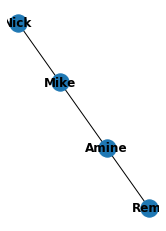

In [7]:
#Affichage du Graphe G
import matplotlib.pyplot as plt


subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

# Part 2. Calculating centrality metrics using Python

In [8]:
G = nx.Graph()

In [9]:
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])

In [10]:
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5), (1,6),(1,7),(2,8),(2,9)])

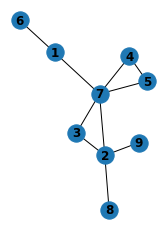

In [11]:
#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

## Degree Centrality

In [12]:
nx.degree_centrality(G)

{1: 0.25,
 2: 0.5,
 3: 0.25,
 4: 0.25,
 5: 0.25,
 6: 0.125,
 7: 0.625,
 8: 0.125,
 9: 0.125}

La centralité représente au nombre de sommet connecté au noeud n, divisé par le nombre de noeud restant n - 1, par exemple pour le noeud 7, qui à la plus grande valeur, on a 5 arrètes connectées divisé par 9-1 = 8 soit 5/8 = 0.625

On observe ici que le noeud numéro 7 est le plus grand car il à le plus d'arrètes connectées à lui.


## Betweenness Centrality

In [13]:
nx.betweenness_centrality(G)

{1: 0.25,
 2: 0.46428571428571425,
 3: 0.0,
 4: 0.0,
 5: 0.0,
 6: 0.0,
 7: 0.7142857142857142,
 8: 0.0,
 9: 0.0}

La betweenness centrality représente le taux de passage par un noeud n pour tout nos plus court chemin, plus celui-ci sera proche de 1, plus ce noeud sera un point de passage pour les plus courts chemins.

On observe que le noeud 7 est le plus actif lors du calcul des plus courts chemins entre tous nos noeux

## Closeness Centrality

In [14]:
nx.closeness_centrality(G)

{1: 0.5,
 2: 0.6153846153846154,
 3: 0.5333333333333333,
 4: 0.47058823529411764,
 5: 0.47058823529411764,
 6: 0.34782608695652173,
 7: 0.7272727272727273,
 8: 0.4,
 9: 0.4}

# Part 3. Fraud Analytics

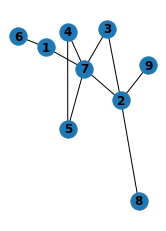

In [15]:
G = nx.Graph()
G.add_nodes_from([1,2, 3,4,5,6,7,8,9])
G.add_edges_from([(7,2), (2,3), (7,4), (4,5), (7,3), (7,5),(1,6),(1,7),(2,8),(2,9)])

#Affichage du graph
subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [16]:
G.add_nodes_from([2,5,6,7], fraud='F')
G.add_nodes_from([1,4,3,8,9], fraud='NF')

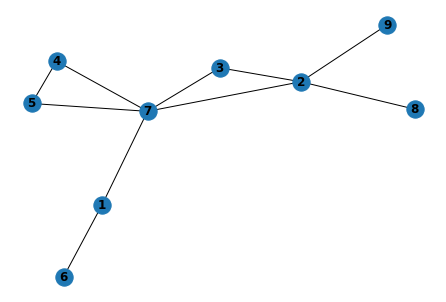

In [17]:
nx.draw(G, with_labels=True, font_weight='bold')

In [18]:
labels = nx.get_node_attributes(G,'fraud') 

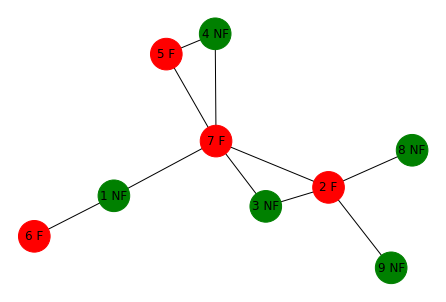

In [19]:

NF = [1,4,3,8,9]
F = [2,5,6,7]
color_map = []
labels = {}
for i in G.nodes():
    if i in NF:
        color_map.append('green')
        labels[i] = str(i) + " NF"
    else:
        color_map.append('red')
        labels[i] = str(i) + " F"
nx.draw(G, labels=labels, node_color=color_map, font_size=12, node_size=1000 )

In [20]:
G.add_node(10)
G.add_edges_from([(10,1),(10,7),(10,5)])

In [24]:
NF = [1,4,3,8,9]
F = [2,5,6,7]
def is_fraud(node):
    proba = 1/G.degree[node]
    proba

In [25]:
is_fraud(4)

In [26]:
G.degree[7]

6